<a href="https://colab.research.google.com/github/MonsterHorn/MachineLearning/blob/main/%E3%80%90%E9%9A%8F%E6%9C%BA%E6%A3%AE%E6%9E%97%E3%80%91%E4%B9%B3%E8%85%BA%E7%99%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
dataset = load_breast_cancer()
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [8]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,dataset.data,dataset.target,cv=10).mean()
score_pre

0.9596177944862155

MAX: 0.9631265664160402 INDEX: 71


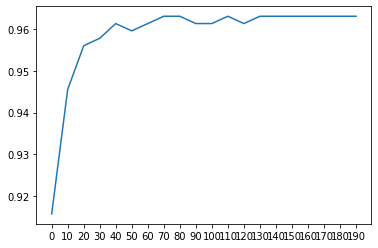

In [19]:
# 先调n_estimators
score_est = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,random_state=90,n_jobs=-1)# n_jobs表示cpu里的所有core进行工作
    score_pre = cross_val_score(rfc,dataset.data,dataset.target,cv=10).mean()
    score_est.append(score_pre)
print('MAX:',max(score_est),'INDEX:',(score_est.index(max(score_est))*10)+1)

plt.plot(range(0,200,10),score_est)
plt.xticks(range(0,200,10))
plt.show()

MAX: 0.9631578947368421 INDEX: 3


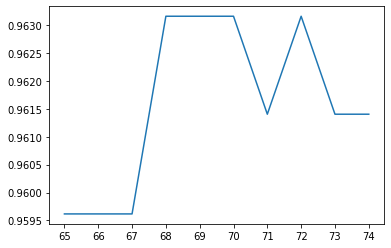

In [18]:
# 缩小范围n_estimators
score_est = []
for i in range(65,75):
    rfc = RandomForestClassifier(n_estimators=i+1,random_state=120,n_jobs=-1)# n_jobs表示cpu里的所有core进行工作
    score_pre = cross_val_score(rfc,dataset.data,dataset.target,cv=10).mean()
    score_est.append(score_pre)
print('MAX:',max(score_est),'INDEX:',(score_est.index(max(score_est))))

plt.plot(range(65,75),score_est)
plt.xticks(range(65,75))
plt.show()

In [14]:
param_grid = {'max_depth':np.arange(1,20)}
rfc = RandomForestClassifier(n_estimators=i+1,random_state=120,n_jobs=-1)# n_jobs表示cpu里的所有core进行工作
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(dataset.data,dataset.target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=191, n_jobs=-1,
                                              oob_score=False, random_state=120,
                                  

In [16]:
GS.best_params_ 

{'max_depth': 10}

In [17]:
GS.best_score_
#  'criterion':['gini','entropy']
#  min_samples_leaf(降低复杂度)
#  min_samples_split(降低复杂度)
# 准确率下降，说明 需要提高模型的复杂度，用max_features(提高，降低都可)

0.9649122807017545